### Imports

In [500]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
import warnings
import datetime
warnings.filterwarnings("ignore")
import pickle

### Loading in Optical Flow Data

In [349]:
filename = 'optical_flow'
infile = open(filename,'rb')
of_df = pickle.load(infile)
infile.close()

In [350]:
of_df.columns

Index(['Unnamed: 0', 'label_wnr_012', 'predicted_wnr_012', 'confidence_wnr_01',
       'label_time', 'probability_wake', 'probability_nrem', 'probability_rem',
       'video_filename_ix', 'video_filename', 'video_frame_ix',
       'neural_filename_ix', 'neural_filename', 'neural_offset',
       'dataset_name', 'ix', 'normalized_flow', 'percentile_normalized_flow',
       'median_filter_percentile_normalized_flow',
       'local_median_filter_percentile_normalized_flow', 'flicker',
       'flicker_flavor', 'flicker_region', 'time_since_last_state_change_sec',
       'time_to_next_state_change_sec', 'proportion_wake_3600s_window',
       'is_in_wide_band_high_activity',
       'time_in_wide_band_high_activity_forward',
       'time_in_wide_band_high_activity_reverse',
       'length_segment_wide_band_high_activity',
       'is_in_wide_band_low_activity',
       'time_in_wide_band_low_activity_forward',
       'time_in_wide_band_low_activity_reverse',
       'length_segment_wide_band_low_

In [351]:
of_df.shape

(11409229, 45)

In [352]:
of_df['dataset_name'].unique()

array(['CAF26', 'CAF34', 'CAF42', 'CAF69', 'EAB40', 'EAB50_5state',
       'CAF99', 'CAF106', 'CAF77'], dtype=object)

In [354]:
of_df['flicker_flavor'].unique()

array([None, 'WAKE_WITHIN_NREM', 'REM_WITHIN_NREM', 'NREM_WITHIN_REM',
       'NREM_WITHIN_WAKE', 'REM_WITHIN_WAKE', 'WAKE_WITHIN_REM'],
      dtype=object)

In [186]:
video_names = of_df['video_filename'].unique()
video_names

array(['e3v819c-20200807T1404-1509.mp4', 'e3v819c-20200807T1509-1609.mp4',
       'e3v819c-20200807T1609-1709.mp4', 'e3v819c-20200807T1709-1809.mp4',
       'e3v819c-20200807T1809-1909.mp4', 'e3v819c-20200807T1909-2009.mp4',
       'e3v819c-20200807T2009-2109.mp4', 'e3v819c-20200807T2109-2209.mp4',
       'e3v819c-20200807T2209-2309.mp4', 'e3v819c-20200807T2309-0009.mp4',
       'e3v819c-20200808T0009-0109.mp4', 'e3v819c-20200808T0109-0209.mp4',
       'e3v819c-20200808T0209-0309.mp4', 'e3v819c-20200808T0309-0409.mp4',
       'e3v819c-20200808T0409-0509.mp4', 'e3v819c-20200808T0509-0609.mp4',
       'e3v819c-20200808T0609-0709.mp4', 'e3v819c-20200808T0709-0809.mp4',
       'e3v819c-20200808T0809-0909.mp4', 'e3v819c-20200808T0909-1009.mp4',
       'e3v819c-20200808T1009-1109.mp4', 'e3v819c-20200808T1109-1209.mp4',
       'e3v819c-20200808T1209-1309.mp4', 'e3v819c-20200808T1309-1409.mp4',
       'e3v819c-20200827T171404-181405.mp4',
       'e3v819c-20200827T181405-191405.mp4',
       'e3

### Apply Rule to Existing Values - Prediction!

In [187]:
#median filter on normalized OF
def median_filter(video_name, filter_length = 5):
    ref_df = of_df[of_df['video_filename'] == video_name]
    return scipy.signal.medfilt(ref_df['percentile_normalized_flow'].values, filter_length)

In [188]:
#is in high activity
def is_in_hact(threshold_value, median_filter):
    is_in = []
    for i in range(len(median_filter)):
        if median_filter[i] >= threshold_value:
            is_in.append(True) 
        else:
            is_in.append(False)
    return is_in

### Filling New Dataframe

Procedure:

1. Apply Median Filter to Normalized Flow Values, width being 5
2. If NFV > threshold, threshold being 0.35, annotation = 1

In [189]:
# #consistent with the indexes of the dataframe
# med_fil = []
# for i, video_name in enumerate(video_names):
#     med_fil.extend(median_filter(video_name))

In [190]:
# shortb = is_in_hact(0.35, med_fil)
# pred = np.asarray(shortb).astype(int)
# normalized = of_df['percentile_normalized_flow']
# videos = of_df['video_filename']
# flickers = of_df['flicker_flavor']

In [207]:
# trace_df = of_df.copy()
# trace_df['median_filter_pnf'] = med_fil
# trace_df['short_band_set_threshold'] = shortb
# trace_df['traces'] = pred

Run to open up trace dataframe:

In [209]:
filename = 'traces'
infile = open(filename,'rb')
trace_df = pickle.load(infile)
infile.close()

In [210]:
trace_df

Unnamed: 0  label_wnr_012  predicted_wnr_012  confidence_wnr_01  \
0                  0              1                  1           0.583268   
1                  1              1                  1           0.546212   
2                  2              1                  1           0.577208   
3                  3              1                  1           0.574839   
4                  4              1                  1           0.580574   
...              ...            ...                ...                ...   
11409224    16425667              0                  0           0.860387   
11409225    16425669              0                  0           0.857036   
11409226    16425671              0                  0           0.850783   
11409227    16425673              0                  0           0.791309   
11409228    16425675              0                  0           0.686618   

          label_time  probability_wake  probability_nrem  probability_rem  \
0          154.06667          0.072166          0.812567         0.115267   
1          154.00000          0.052541          0.791218         0.156241   
2          153.93333          0.058497          0.808323         0.133179   
3          153.86667          0.060460          0.807319         0.132221   
4          153.80000          0.059889          0.810197         0.129914   
...              ...               ...               ...              ...   
11409224  1304.83340          0.939613          0.010562         0.049825   
11409225  1304.90000          0.938141          0.011167         0.050691   
11409226  1304.96670          0.935358          0.011576         0.053066   
11409227  1305.03330          0.908290          0.012862         0.078848   
11409228  1305.10000          0.858402          0.017118         0.124480   

          video_filename_ix                      video_filename  ...  \
0                         0      e3v819c-20200807T1404-1509.mp4  ...   
1                         0      e3v819c-20200807T1404-1509.mp4  ...   
2                         0      e3v819c-20200807T1404-1509.mp4  ...   
3                         0      e3v819c-20200807T1404-1509.mp4  ...   
4                         0      e3v819c-20200807T1404-1509.mp4  ...   
...                     ...                                 ...  ...   
11409224                 22  e3v819c-20210203T124855-134855.mp4  ...   
11409225                 22  e3v819c-20210203T124855-134855.mp4  ...   
11409226                 22  e3v819c-20210203T124855-134855.mp4  ...   
11409227                 22  e3v819c-20210203T124855-134855.mp4  ...   
11409228                 22  e3v819c-20210203T124855-134855.mp4  ...   

          length_segment_short_band_high_activity  \
0                                              -1   
1                                              -1   
2                                              -1   
3                                              -1   
4                                              -1   
...                                           ...   
11409224                                       -1   
11409225                                       -1   
11409226                                       -1   
11409227                                       -1   
11409228                                       -1   

          is_in_short_band_low_activity  \
0                                  True   
1                                  True   
2                                  True   
3                                  True   
4                                  True   
...                                 ...   
11409224                           True   
11409225                           True   
11409226                           True   
11409227                           True   
11409228                           True   

         time_in_short_band_low_activity_forward  \
0                                              1   
1                                    

In [219]:
mod_df = trace_df[['dataset_name', 'video_filename', 'flicker_flavor', 'median_filter_pnf', 'traces']].copy()

In [374]:
mod_df

dataset_name                      video_filename flicker_flavor  \
0               CAF26      e3v819c-20200807T1404-1509.mp4           None   
1               CAF26      e3v819c-20200807T1404-1509.mp4           None   
2               CAF26      e3v819c-20200807T1404-1509.mp4           None   
3               CAF26      e3v819c-20200807T1404-1509.mp4           None   
4               CAF26      e3v819c-20200807T1404-1509.mp4           None   
...               ...                                 ...            ...   
11409224        CAF77  e3v819c-20210203T124855-134855.mp4           None   
11409225        CAF77  e3v819c-20210203T124855-134855.mp4           None   
11409226        CAF77  e3v819c-20210203T124855-134855.mp4           None   
11409227        CAF77  e3v819c-20210203T124855-134855.mp4           None   
11409228        CAF77  e3v819c-20210203T124855-134855.mp4           None   

          median_filter_pnf  traces  
0                  0.052297       0  
1                  0.061609       0  
2                  0.061609       0  
3                  0.061609       0  
4                  0.060976       0  
...                     ...     ...  
11409224           0.719499       1  
11409225           0.718657       1  
11409226           0.710439       1  
11409227           0.708552       1  
11409228           0.684869       1  

[11409229 rows x 5 columns]

In [380]:
mod_df['dataset_name'].unique()

array(['CAF26', 'CAF34', 'CAF42', 'CAF69', 'EAB40', 'EAB50_5state',
       'CAF99', 'CAF106', 'CAF77'], dtype=object)

In [418]:
mouse_vids = {}

In [419]:
for video_name in video_names:
    mouse_name = mod_df.loc[mod_df["video_filename"] == video_name]["dataset_name"].unique()[0]
    mouse_vids[video_name] = mouse_name

### Verification

In [211]:
from itertools import groupby
from collections import defaultdict

def find_groups(arr):
    i = 0
    result = defaultdict(list)
    for k, g in groupby(arr):
        elems = len(list(g))
        result[k].append((i, i+elems-1))
        i += elems
    
    return result

In [464]:
total_frames = mod_df['video_filename'].value_counts()
total_frames

e3v819c-20210203T044850-054851.mp4     54016
e3v819c-20210202T234846-004846.mp4     54016
e3v81a6-20201230T165847-175848.mp4     54016
e3v81a6-20201231T085854-095855.mp4     54016
e3v819c-20210202T174844-184845.mp4     54016
                                       ...  
e3v819c-20200808T1309-1409.mp4         46038
e3v819c-20200828T161421-171422.mp4     44868
CAF00099-20210608T100849-110521.mp4    23984
CAF00106-20210608T100851-110522.mp4    23769
e3v8100-20190329T1628-1728.mp4          3654
Name: video_filename, Length: 214, dtype: int64

In [213]:
#MAKE SURE TO RUN
def calculate_frames(start, end):
    mid_frame = (int)((end - start)) + start
    start_frame = mid_frame - 450
    end_frame = mid_frame + 450
    
    return start_frame, end_frame

In [467]:
fps = {"CAF99": 30, "CAF106": 30, "CAF26":15, "EAB40": 15, "EAB50_5state": 15, "CAF69": 30, "CAF42": 15, "CAF34": 15, "CAF77" : 15}
def frame_range(mouse_name, start, end):
    # df idx locations
    start_idx = int(((start + end)/2) - (30*15))
    end_idx = int(((start + end)/2) + (30*15))
    idx_range = np.arange(start_idx, end_idx + 1, 1)
    if idx_range[-1] > 54000 or idx_range[0] < 0 or idx_range[-1] < 0 or idx_range[0] > 54000:
        return None
    sidx = int(start_idx*(fps[mouse_name]/15)-1) if fps[mouse_name] != 15 else start_idx
    eidx = int(end_idx*(fps[mouse_name]/15)) if fps[mouse_name] != 15 else end_idx
    
    return sidx, eidx

In [432]:
#MAKE SURE TO RUN
def annotations(video_name, video_df, flicker):
    flicker_start = flicker[0]
    flicker_end = flicker[1]
    
    frame_start, frame_end = calculate_frames(flicker_start, flicker_end)
    
    name = video_name.split(".")[0] + "_f" + format(flicker_start) + "-" + "f" + format(flicker_end) + ".mp4"
    ants = video_df['traces'][frame_start:frame_end].values
    
    return name, ants

In [469]:
#MAKE SURE TO RUN
def annotations_pt2(video_name, video_df, flicker):
    flicker_start = flicker[0]
    flicker_end = flicker[1]
    
    frame_start, frame_end = frame_range(mouse_vids[video_name], flicker_start, flicker_end)
    
    name = video_name.split(".")[0] + "_f" + format(flicker_start) + "-" + "f" + format(flicker_end) + ".mp4"
    ants = video_df['traces'][frame_start:frame_end].values
    
    return name, ants

In [447]:
frame_range("CAF26", 33233, 33444)

range(32888, 33788)

In [242]:
#DO NOT RUN
#use video names as keys
# frames = {}
all_flickers = {}

In [434]:
traces_pt2 = {}

In [254]:
#use flicker names as keys, representing 60 second videos/900 frames
#frame_times = {}
all_traces = {}
timestamps = {}

In [472]:
timestamps_pt2 = {}

In [376]:
for video_name in video_names:
    video_df = mod_df.loc[mod_df['video_filename'] == video_name]
    flicker = video_df['flicker_flavor'].values
    groups = find_groups(flicker).get('WAKE_WITHIN_NREM')
    
    vid_flickers = []
    if groups != None:
        for group in groups:
            if frame_range(mouse_vids[video_name], group[0], group[1]) != None:
                vid_flickers.append(group)
        all_flickers[video_name] = vid_flickers
    else:
        all_flickers[video_name] = None

In [267]:
for i, video_name in enumerate(video_names):
    video_df = mod_df.loc[mod_df['video_filename'] == video_name]
    cur_flickers = all_flickers.get(video_name)
    if cur_flickers != None:
        for j, flicker in enumerate(cur_flickers):
            name, ants = annotations(video_name, video_df, flicker)
            all_traces[name] = ants
    else:
        all_traces[video_name] = None

In [470]:
for i, video_name in enumerate(video_names):
    video_df = mod_df.loc[mod_df['video_filename'] == video_name]
    cur_flickers = all_flickers.get(video_name)
    if cur_flickers != None:
        for j, flicker in enumerate(cur_flickers):
            name, ants = annotations_pt2(video_name, video_df, flicker)
            traces_pt2[name] = ants
    else:
        traces_pt2[video_name] = None

In [437]:
all_traces

{'e3v819c-20200807T1404-1509_f7575-f7604.mp4': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [471]:
traces_pt2

{'e3v819c-20200807T1404-1509_f7575-f7604.mp4': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [476]:
for key in all_traces.keys():
    if all_traces[key] is None:
        timestamps[key] = None
    else:
        groups = find_groups(all_traces[key]).get(1)
        if groups != None:
            all_ants = []
            for j, sub_ant in enumerate(groups):
                start = (sub_ant[0])/15
                end = (sub_ant[1] + 1)/15

                start_time = str(datetime.timedelta(seconds = start))
                end_time = str(datetime.timedelta(seconds = end))
                
                all_ants.append([start_time, end_time])
                
            timestamps[key] = all_ants
        else:
            timestamps[key] = None

In [475]:
for key in traces_pt2.keys():
    if traces_pt2[key] is None:
        timestamps_pt2[key] = None
    else:
        groups = find_groups(traces_pt2[key]).get(1)
        if groups != None:
            all_ants = []
            for j, sub_ant in enumerate(groups):
                video = key.split("_")[0] + ".mp4"
                start = ((sub_ant[0]) * 60) / (fps[mouse_vids[video]])
                end = ((sub_ant[1]) * 60)/ (fps[mouse_vids[video]])

                start_time = str(datetime.timedelta(seconds = start))
                end_time = str(datetime.timedelta(seconds = end))
                
                all_ants.append([start_time, end_time])
                
            timestamps_pt2[key] = all_ants
        else:
            timestamps_pt2[key] = None

In [477]:
timestamps

{'e3v819c-20200807T1404-1509_f7575-f7604.mp4': [['0:00:26.800000',
   '0:00:28.800000'],
  ['0:00:30.200000', '0:00:40.866667']],
 'e3v819c-20200807T1509-1609.mp4': None,
 'e3v819c-20200807T1609-1709_f48975-f49018.mp4': [['0:00:00',
   '0:00:03.066667'],
  ['0:00:04.133333', '0:00:05.400000'],
  ['0:00:34.400000', '0:00:36.266667']],
 'e3v819c-20200807T1609-1709_f50449-f50463.mp4': [['0:00:20.666667',
   '0:00:25.733333'],
  ['0:00:35.533333', '0:00:39.466667']],
 'e3v819c-20200807T1609-1709_f50480-f50487.mp4': [['0:00:19.066667',
   '0:00:24.133333'],
  ['0:00:33.933333', '0:00:37.866667']],
 'e3v819c-20200807T1609-1709_f52883-f52906.mp4': [['0:00:35.333333',
   '0:00:38.733333']],
 'e3v819c-20200807T1709-1809_f14510-f14517.mp4': [['0:00:35.733333',
   '0:00:37.400000'],
  ['0:00:42.733333', '0:00:45.266667']],
 'e3v819c-20200807T1809-1909_f9979-f9986.mp4': None,
 'e3v819c-20200807T1909-2009_f14830-f14895.mp4': [['0:00:34.533333',
   '0:00:37.866667']],
 'e3v819c-20200807T1909-2009_f2

In [478]:
timestamps_pt2

{'e3v819c-20200807T1509-1609.mp4': None,
 'e3v819c-20200807T2309-0009.mp4': None,
 'e3v819c-20200808T0009-0109.mp4': None,
 'e3v819c-20200808T0109-0209.mp4': None,
 'e3v819c-20200808T0509-0609.mp4': None,
 'e3v819c-20200808T0609-0709.mp4': None,
 'e3v819c-20200808T1109-1209.mp4': None,
 'e3v819c-20200827T191405-201406.mp4': None,
 'e3v819c-20200827T231408-001408.mp4': None,
 'e3v819c-20200828T001408-011409.mp4': None,
 'e3v819c-20200828T011409-021410.mp4': None,
 'e3v819c-20200828T041411-051412.mp4': None,
 'e3v819c-20200828T161421-171422.mp4': None,
 'e3v81a6-20200915T012242-022243.mp4': None,
 'e3v81a6-20200915T022243-032244.mp4': None,
 'e3v81a6-20200915T032244-042245.mp4': None,
 'e3v81a6-20200915T052246-062246.mp4': None,
 'e3v81a6-20201230T185849-195850.mp4': None,
 'e3v817b-20190705T1855-1955.mp4': None,
 'e3v817b-20190705T1955-2055.mp4': None,
 'e3v817b-20190705T2255-2355.mp4': None,
 'e3v817b-20190706T1055-1155.mp4': None,
 'CAF00099-20210607T190842-200843.mp4': None,
 'CAF000

In [328]:
total

460

### Pickling Again

In [115]:
# filename = 'flickers'
# outfile = open(filename,'wb')
# pickle.dump(flickers, outfile)
# outfile.close()

In [154]:
# filename = 'flickers'
# infile = open(filename,'rb')
# p_flicker = pickle.load(infile)
# infile.close()

In [152]:
# filename = 'traces'
# outfile = open(filename,'wb')
# pickle.dump(traces, outfile)
# outfile.close()

In [157]:
# filename = 'traces'
# infile = open(filename,'rb')
# p_traces = pickle.load(infile)
# infile.close()

### Verification + Plots

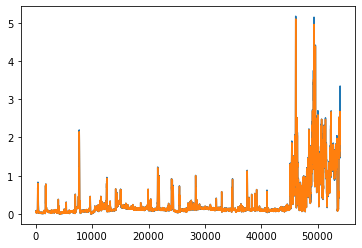

In [229]:
normalization = trace_df['percentile_normalized_flow'].values[0:54000]
filtered = trace_df['median_filter_pnf'].values[0:54000]

x = range(len(normalization))
plt.figure()
plt.plot(x, normalization)
plt.plot(x, filtered)
plt.show()

In [488]:
def plt_video(video_name):
    video_df = mod_df.loc[mod_df["video_filename"] == video_name]
    every_flicker = all_flickers.get(video_name)
    
    for i, flicker in enumerate(every_flicker):
        start, end = calculate_frames(flicker[0], flicker[1])
        name, ant = annotations(video_name, video_df, flicker)
        print(name)
        
        x = range(len(ant))
        plt.plot(x, ant)
        plt.plot(x, video_df["median_filter_pnf"][start:end].values)
        plt.axhline(y=0.35, color='r', linestyle='-')
        plt.title(name)
        plt.show()

e3v81a6-20201230T155846-165847_f18133-f18175.mp4


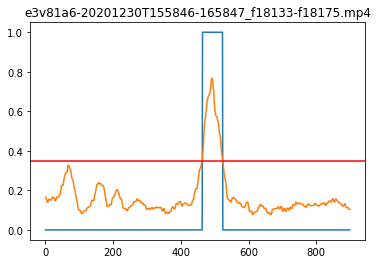

e3v81a6-20201230T155846-165847_f18300-f18309.mp4


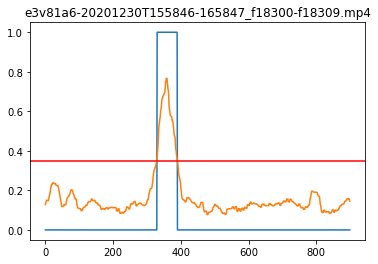

e3v81a6-20201230T155846-165847_f20036-f20048.mp4


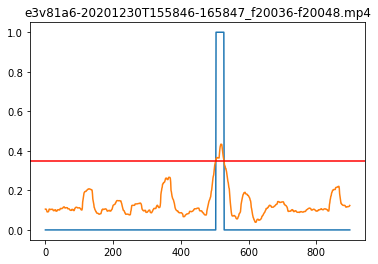

e3v81a6-20201230T155846-165847_f25227-f25261.mp4


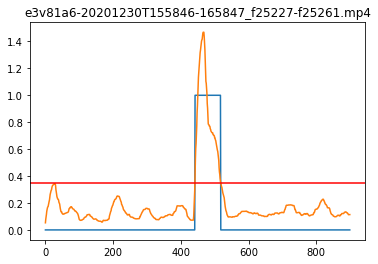

e3v81a6-20201230T155846-165847_f26236-f26273.mp4


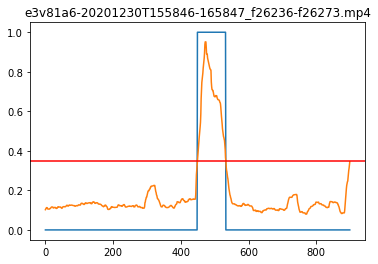

e3v81a6-20201230T155846-165847_f30322-f30460.mp4


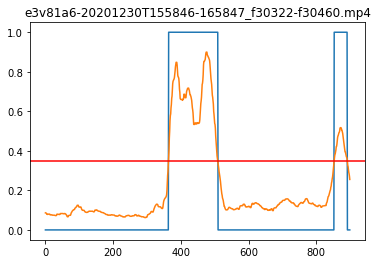

e3v81a6-20201230T155846-165847_f30809-f30818.mp4


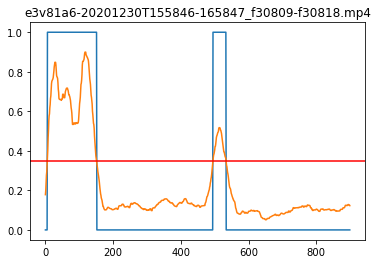

e3v81a6-20201230T155846-165847_f31910-f31917.mp4


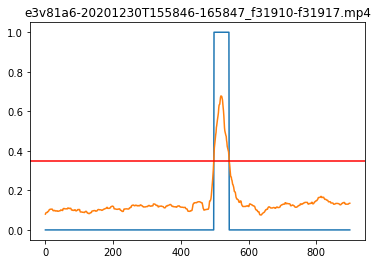

e3v81a6-20201230T155846-165847_f31960-f31974.mp4


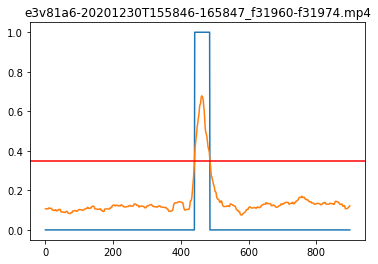

e3v81a6-20201230T155846-165847_f41561-f41588.mp4


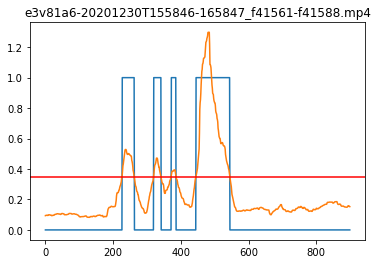

e3v81a6-20201230T155846-165847_f42753-f42775.mp4


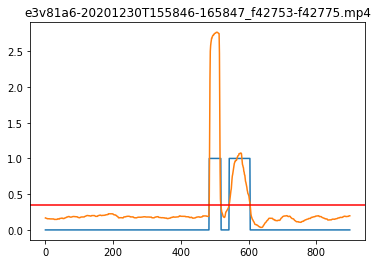

e3v81a6-20201230T155846-165847_f42817-f42826.mp4


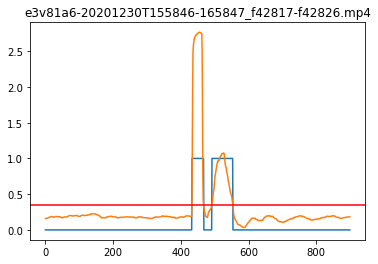

e3v81a6-20201230T165847-175848_f3207-f3227.mp4


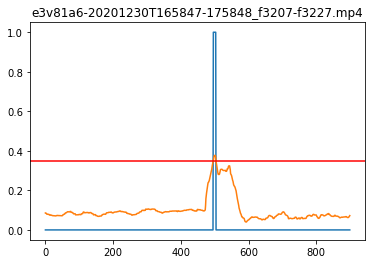

e3v81a6-20201230T165847-175848_f3642-f3662.mp4


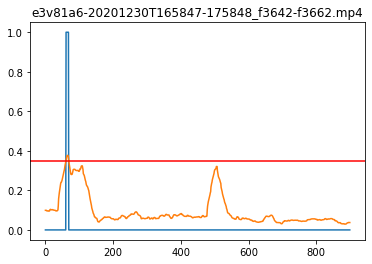

e3v81a6-20201230T165847-175848_f4893-f4901.mp4


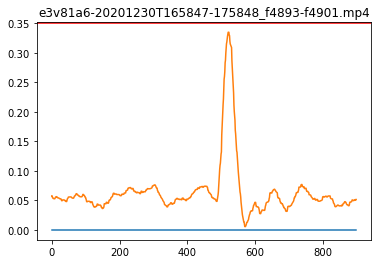

e3v81a6-20201230T165847-175848_f10650-f10672.mp4


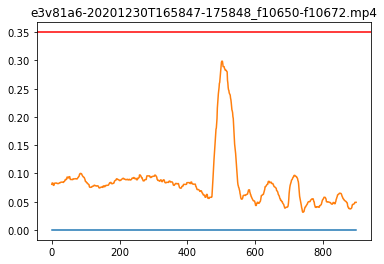

e3v81a6-20201230T165847-175848_f14146-f14149.mp4


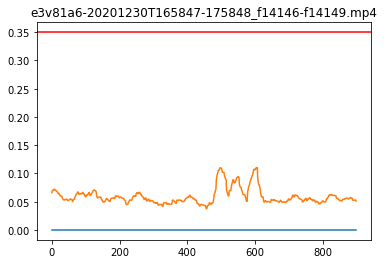

e3v81a6-20201230T165847-175848_f40785-f40793.mp4


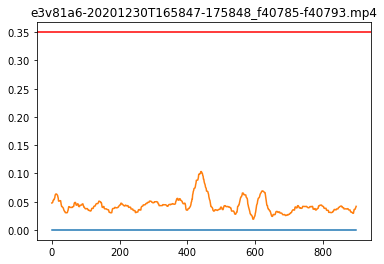

e3v81a6-20201230T175848-185849_f12604-f12618.mp4


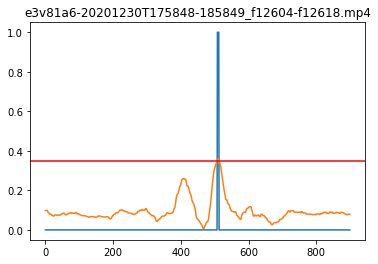

e3v81a6-20201230T175848-185849_f24459-f24482.mp4


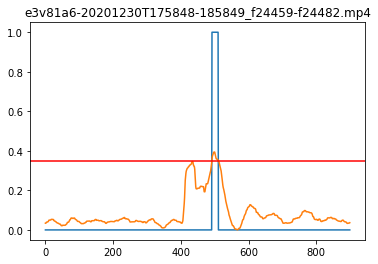

TypeError: 'NoneType' object is not iterable

In [489]:
mouse_name = "CAF69"
videos = np.unique(mod_df.loc[mod_df["dataset_name"] == mouse_name]["video_filename"].values)

for i, video in enumerate(videos):
    plt_video(video)

e3v81a6-20201230T155846-165847_f18133-f18175.mp4


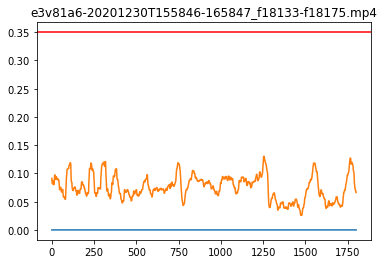

e3v81a6-20201230T155846-165847_f18300-f18309.mp4


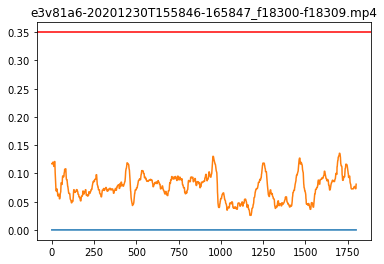

e3v81a6-20201230T155846-165847_f20036-f20048.mp4


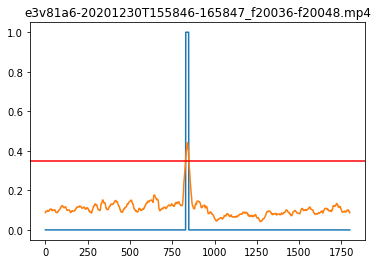

e3v81a6-20201230T155846-165847_f25227-f25261.mp4


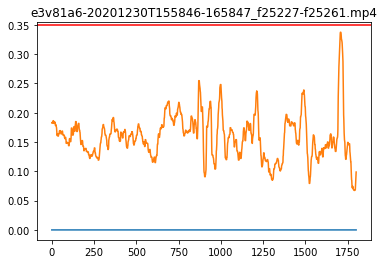

e3v81a6-20201230T155846-165847_f26236-f26273.mp4


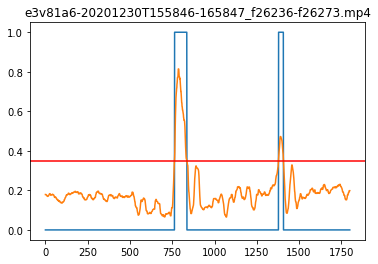

e3v81a6-20201230T155846-165847_f30322-f30460.mp4


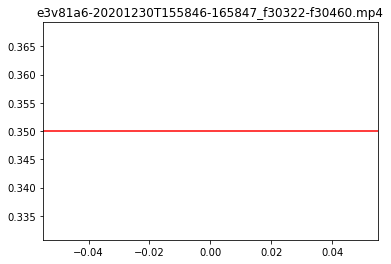

e3v81a6-20201230T155846-165847_f30809-f30818.mp4


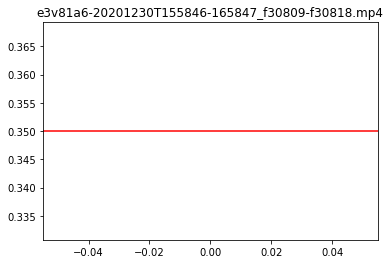

e3v81a6-20201230T155846-165847_f31910-f31917.mp4


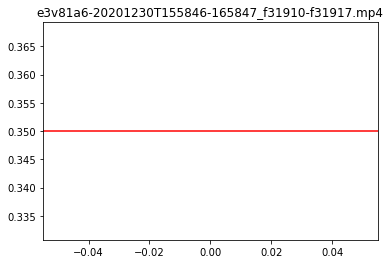

e3v81a6-20201230T155846-165847_f31960-f31974.mp4


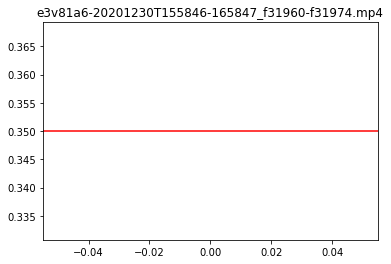

e3v81a6-20201230T155846-165847_f41561-f41588.mp4


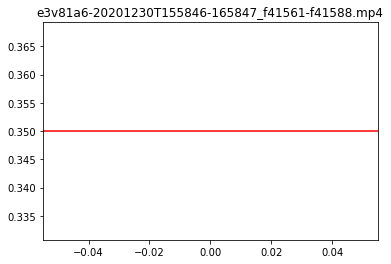

e3v81a6-20201230T155846-165847_f42753-f42775.mp4


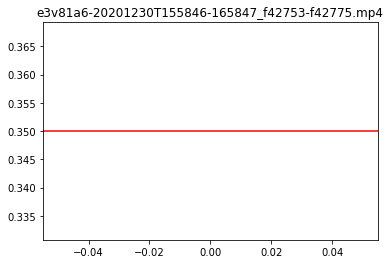

e3v81a6-20201230T155846-165847_f42817-f42826.mp4


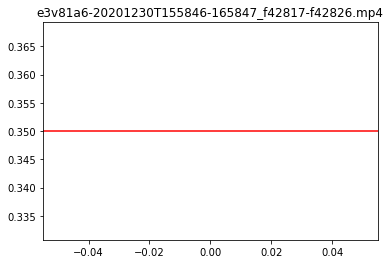

e3v81a6-20201230T165847-175848_f3207-f3227.mp4


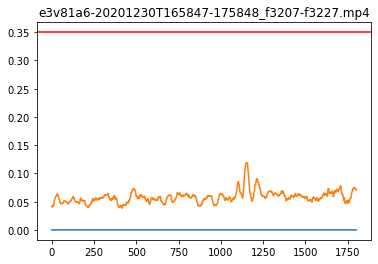

e3v81a6-20201230T165847-175848_f3642-f3662.mp4


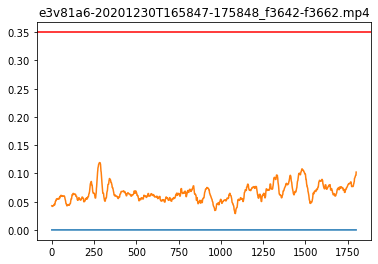

e3v81a6-20201230T165847-175848_f4893-f4901.mp4


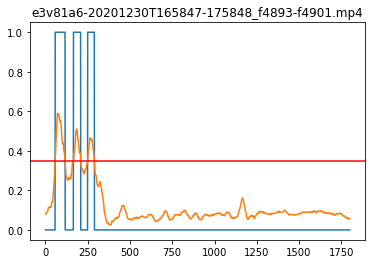

e3v81a6-20201230T165847-175848_f10650-f10672.mp4


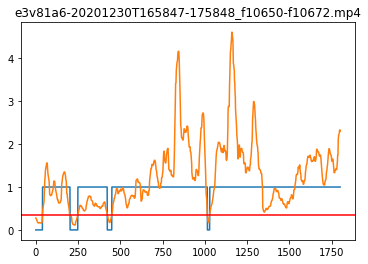

e3v81a6-20201230T165847-175848_f14146-f14149.mp4


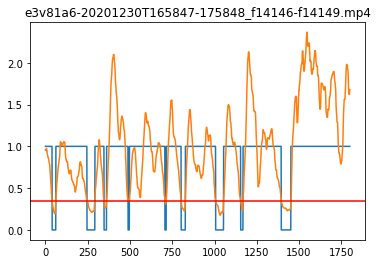

e3v81a6-20201230T165847-175848_f40785-f40793.mp4


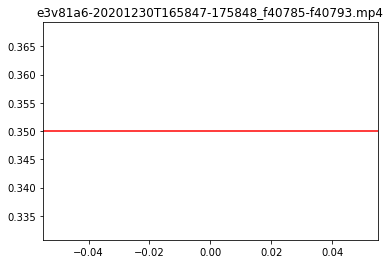

e3v81a6-20201230T175848-185849_f12604-f12618.mp4


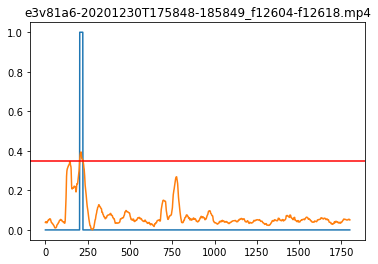

e3v81a6-20201230T175848-185849_f24459-f24482.mp4


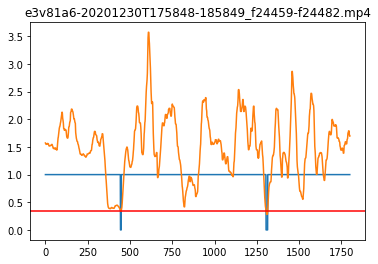

TypeError: 'NoneType' object is not iterable

In [486]:
mouse_name = "CAF69"
videos = np.unique(mod_df.loc[mod_df["dataset_name"] == mouse_name]["video_filename"].values)

for i, video in enumerate(videos):
    plt_video(video)

### Practical Use

In [491]:
video_name = 'e3v81a6-20201230T155846-165847_f20036-f20048.mp4'
print(timestamps.get(video_name))

[['0:00:33.600000', '0:00:35.200000']]


In [107]:
video = video_name.split("_")[0] + ".mp4"
len(pred_ant.get(video_name))

900

In [498]:
all_flickers

{'e3v819c-20200807T1404-1509.mp4': [(7575, 7604)],
 'e3v819c-20200807T1509-1609.mp4': None,
 'e3v819c-20200807T1609-1709.mp4': [(48975, 49018),
  (50449, 50463),
  (50480, 50487),
  (52883, 52906)],
 'e3v819c-20200807T1709-1809.mp4': [(14510, 14517)],
 'e3v819c-20200807T1809-1909.mp4': [(9979, 9986)],
 'e3v819c-20200807T1909-2009.mp4': [(14830, 14895),
  (25842, 25857),
  (25873, 25910),
  (26677, 26710),
  (30790, 30802)],
 'e3v819c-20200807T2009-2109.mp4': [(47698, 47728),
  (48090, 48108),
  (48110, 48120),
  (53044, 53119),
  (53123, 53172)],
 'e3v819c-20200807T2109-2209.mp4': [(31544, 31597),
  (31677, 31749),
  (35044, 35057),
  (37164, 37190)],
 'e3v819c-20200807T2209-2309.mp4': [(4130, 4202),
  (4482, 4564),
  (6499, 6547),
  (12116, 12180)],
 'e3v819c-20200807T2309-0009.mp4': None,
 'e3v819c-20200808T0009-0109.mp4': None,
 'e3v819c-20200808T0109-0209.mp4': None,
 'e3v819c-20200808T0209-0309.mp4': [(45510, 45515), (45542, 45569)],
 'e3v819c-20200808T0309-0409.mp4': [(30718, 307

In [58]:
#flicker dictionary - redundant
# for i, video_name in enumerate(video_names):
#     cur_vid = flickers.get(video_name)
#     if cur_vid != None:
#         vid_frames = []
#         for j, cur_frames in enumerate(cur_vid):
#             start_frame, end_frame = calculate_frames(cur_frames[0], cur_frames[1])      
#             vid_frames.append(range(start_frame, end_frame))
#         frames[video_name] = vid_frames
#     else:
#         frames[video_name] = None 

In [54]:
# for i, video_name in enumerate(video_names):
#     cur_vid = frames[video_name]
#     if cur_vid != None:
#         vid_times = []
#         for j, cur_frames in enumerate(cur_vid):
#             start_time = str(datetime.timedelta(seconds=(cur_frames[0]/15)))
            
#             end_time = str(datetime.timedelta(seconds=(cur_frames[1]/15)))
            
#             vid_times.append([start_time, end_time])
#         frame_times[video_name] = vid_times
#     else:
#         frame_times[video_name] = None